In [7]:
import numpy as np
import xarray as xr
import geopandas as gpd
import regionmask as rmask

from glob import glob
import matplotlib.pyplot as plt

In [29]:
geodir = '../forecast-zones/'
zones_shapefile = glob(geodir + '*.shp')[0]

# Read the shapefile
zones = gpd.read_file(zones_shapefile)

# Prune to Western Region using TZ
zones = zones.set_index('TIME_ZONE').loc[['M', 'Mm', 'm', 'MP', 'P']].reset_index()

zones = zones[zones['CWA'] == 'MSO']

zones

In [10]:
# for cwa in np.unique(zones['CWA']):
#     print(cwa, len(np.unique(zones[zones['CWA'] == cwa]['ZONE'])))

In [11]:
# fig, ax = plt.subplots(1, figsize=(16, 12), facecolor='w')
# zones.plot(column='ZONE', ax=ax)
# ax.set_axis_off()
# plt.axis('equal')

In [31]:
elev = xr.open_dataset(geodir + 'usterrain.nc').rename({'longitude':'lon', 'latitude':'lat'})

<xarray.Dataset>
Dimensions:    (lat: 5, lon: 5)
Coordinates:
  * lat        (lat) float32 20.004168 20.0125 20.020834 20.029167 20.0375
  * lon        (lon) float32 -139.99583 -139.9875 ... -139.97084 -139.9625
Data variables:
    elevation  (lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        SRTM30_PLUS: SRTM30, COASTAL & RIDGE MULTIBEAM, ESTIMATED T...
    institution:  Scripps Institution of Oceanography
    references:   http://topex.ucsd.edu/WWW_html/srtm30_plus.html
    comment:      Converted by NOAA/GFDL on 20051209
    history:      Tue Jul  9 09:47:30 2013: /uufs/chpc.utah.edu/sys/pkg/nco/s...

In [68]:
# mask = rmask.mask_geopandas(zones, elev.lon, elev.lat)
# zones = zones.set_index('ZONE')
masks = []
for i, zone in enumerate(zones.index):
    
    print('\r%d/%d %s'%(i+1, zones.index.size, zone), end='')
    
    masks.append([zone, rmask.Regions(zones.loc[zone]['geometry'], elev.lon, elev.lat)])
    
    break

1/14 043

TypeError: 'Polygon' object is not iterable

In [77]:
testmask = rmask.Regions([zones.loc[zone]['geometry']]).mask(elev.lon, elev.lat)

In [81]:
np.nanmean(testmask)

0.0

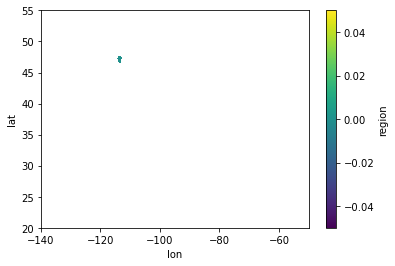

In [79]:
testmask.plot()

In [82]:
zones

,TIME_ZONE,STATE,CWA,FE_AREA,NAME,STATE_ZONE,LON,LAT,SHORTNAME,InPoly_FID,SimPgnFlag,MaxSimpTol,MinSimpTol,geometry
ZONE,,,,,,,,,,,,,,
043,M,MT,MSO,wc,Potomac/Seeley Lake Region,MT043,-113.5840,47.2005,Potomac/Seeley Lake Region,179,0,0.0001,0.0001,"POLYGON ((-113.14470 47.59601, -113.14110 47.5..."
009,M,ID,MSO,ec,Western Lemhi County,ID009,-114.3901,45.1209,Western Lemhi County,2392,0,0.0001,0.0001,"POLYGON ((-113.99960 45.58861, -113.97260 45.5..."
010,M,ID,MSO,ec,Eastern Lemhi County,ID010,-113.5852,44.8081,Eastern Lemhi County,2644,0,0.0001,0.0001,"POLYGON ((-113.98090 45.70271, -113.97359 45.7..."
007,M,MT,MSO,wc,Butte/Blackfoot Region,MT007,-112.9185,46.3886,Butte/Blackfoot Region,2765,0,0.0001,0.0001,"POLYGON ((-113.04919 47.17691, -112.92670 47.1..."
004,M,MT,MSO,wc,Lower Clark Fork Region,MT004,-115.0063,47.3078,Lower Clark Fork Region,2766,0,0.0001,0.0001,"POLYGON ((-114.64159 47.36101, -114.54970 47.3..."
006,M,MT,MSO,wc,Bitterroot/Sapphire Mountains,MT006,-113.9667,46.1931,Bitterroot/Sapphire Mountains,2898,0,0.0001,0.0001,"POLYGON ((-113.66759 46.70291, -113.66560 46.7..."
005,M,MT,MSO,wc,Missoula/Bitterroot Valleys,MT005,-114.1079,46.4888,Missoula/Bitterroot Valleys,2899,0,0.0001,0.0001,"POLYGON ((-114.07210 47.01251, -114.03419 47.0..."
002,M,MT,MSO,nw,West Glacier Region,MT002,-113.8037,48.2755,West Glacier Region,2900,0,0.0001,0.0001,"POLYGON ((-114.23208 49.00017, -114.22160 48.9..."
003,M,MT,MSO,nw,Flathead/Mission Valleys,MT003,-114.2980,47.7732,Flathead/Mission Valleys,2901,0,0.0001,0.0001,"POLYGON ((-114.01589 47.59987, -114.01430 47.5..."


In [89]:
rmask.Regions([])

ValueError: Outline must be 2D